In [31]:
import classicml as cml
import numpy as np
import pandas as pd
from sklearn.datasets import (
    load_iris, 
    load_breast_cancer, 
    fetch_california_housing,
    load_diabetes,
    load_wine,
    make_blobs
)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# 1. IRIS DATASET - Logistic Regression (Multiclass) 

# Реализация на sklearn

Data: 150 samples, 4 features, 3 classes

SKLEARN LOGISTIC REGRESSION (MULTICLASS)
Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



d:\anaconda3\envs\kursach\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


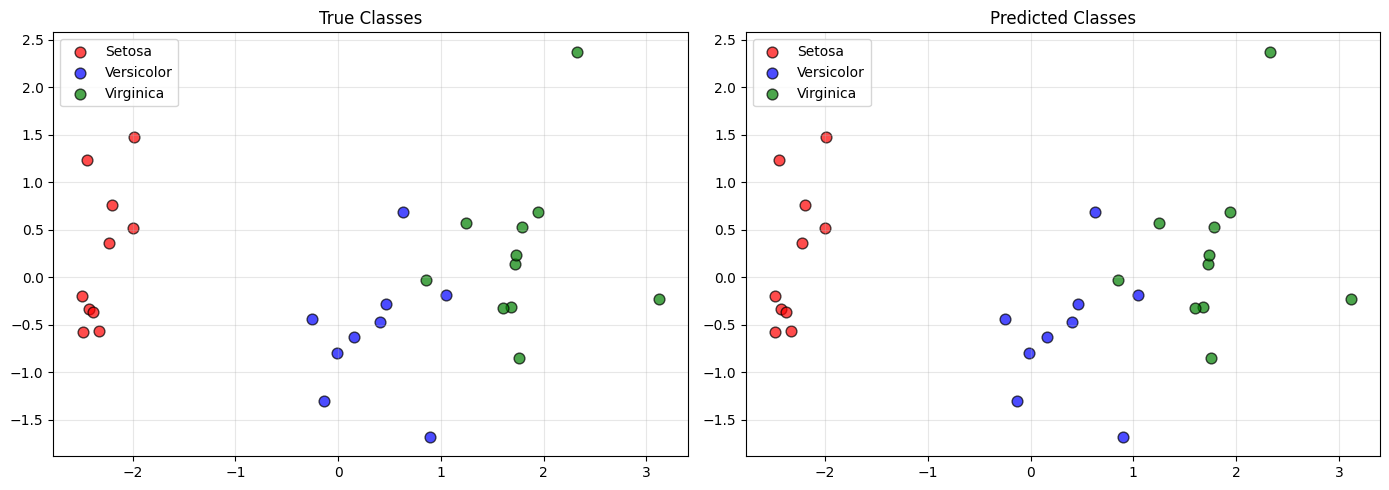

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X = iris.data
y = iris.target

print(f"Data: {X.shape[0]} samples, {X.shape[1]} features, {len(np.unique(y))} classes")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(
    max_iter=1500,
    multi_class='multinomial',
    solver='saga',
    random_state=0,
    verbose=0
)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n{'='*50}")
print(f"SKLEARN LOGISTIC REGRESSION (MULTICLASS)")
print(f"{'='*50}")
print(f"Accuracy: {accuracy:.2%}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))
print(f"{'='*50}")

X_2d = PCA(2).fit_transform(X_test_scaled)
errors = (y_test != y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
colors = ['red', 'blue', 'green']
labels = ['Setosa', 'Versicolor', 'Virginica']

for ax, y, title in [(ax1, y_test, 'True'), (ax2, y_pred, 'Predicted')]:
    for i in range(3):
        mask = (y == i)
        ax.scatter(X_2d[mask, 0], X_2d[mask, 1], c=colors[i], label=labels[i], 
                   s=60, alpha=0.7, edgecolors='k')
    if ax == ax2 and errors.sum() > 0:
        ax.scatter(X_2d[errors, 0], X_2d[errors, 1], s=200, facecolors='none', 
                   edgecolors='orange', linewidths=2.5, label=f'Errors ({errors.sum()})')
    ax.set_title(f'{title} Classes')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


# Реализация на classicml

In [33]:
iris = load_iris()
X = iris.data
y = iris.target

print(f"Data: {X.shape[0]} samples, {X.shape[1]} features, {len(np.unique(y))} classes")

y = cml.numpy_to_matrix(y)
data = cml.Dataset(X, cml.one_hot_encoder(y))

scaler = cml.StandardScaler(data)
scaler.split(ratio=0.8, random=True)
scaler.standart_normalize()

logreg = cml.LogisticRegression(data, "multi")
logreg.train(method="nesterov", iters=1500, lr=0.01)
logreg.predict()
logreg.loss()
data.info()

Data: 150 samples, 4 features, 3 classes
logLoss: 0.290465
accuracy: 0.766667
precision: 0.821429
recall: 0.766667
f1Score: 0.793103

  Y_test  |   Y_pred
  [0] [1 0 0]   |   [1 4.01884e-07 4.90923e-08]
  [1] [0 1 0]   |   [0.000518702 0.591167 0.408314]
  [2] [0 0 1]   |   [2.69926e-06 0.441264 0.558733]
  [3] [0 1 0]   |   [0.000255738 0.893885 0.105859]
  [4] [1 0 0]   |   [0.999999 9.68785e-07 8.28912e-08]
  [5] [0 0 1]   |   [1.51542e-06 0.871646 0.128352]
  [6] [0 0 1]   |   [8.58415e-06 0.0372711 0.96272]
  [7] [1 0 0]   |   [0.999986 1.16841e-05 2.22884e-06]
  [8] [0 0 1]   |   [9.77242e-08 0.0782034 0.921796]
  [9] [0 1 0]   |   [0.0898522 0.809042 0.101106]
  [10] [0 0 1]   |   [2.78621e-05 0.00351393 0.996458]
  [11] [0 1 0]   |   [0.144619 0.325937 0.529445]
  [12] [0 1 0]   |   [0.00184034 0.381472 0.616688]
  [13] [0 1 0]   |   [0.156647 0.403023 0.44033]
  [14] [0 1 0]   |   [0.0429917 0.469007 0.488001]
        ...        |       ...
Total samples: 30


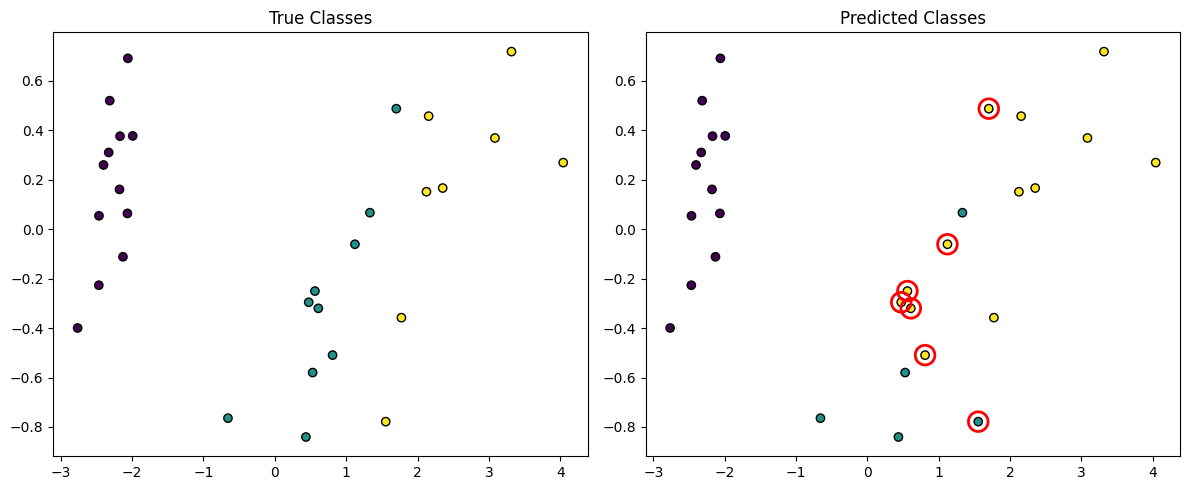

In [34]:
X_test = data.X_test.to_numpy()
y_test = data.Y_test.to_numpy().argmax(axis=1)
y_pred = data.Y_pred.to_numpy().argmax(axis=1)

# PCA в 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_test)

# График
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X_2d[:, 0], X_2d[:, 1], c=y_test, cmap='viridis', edgecolors='black')
ax1.set_title('True Classes')
ax2.scatter(X_2d[:, 0], X_2d[:, 1], c=y_pred, cmap='viridis', edgecolors='black')
ax2.set_title('Predicted Classes')
errors = (y_test != y_pred)
ax2.scatter(X_2d[errors, 0], X_2d[errors, 1], s=200, facecolors='none', edgecolors='red', linewidths=2)
plt.tight_layout()
plt.show()

# 2. BREAST CANCER DATASET - Logistic Regression (Binary)

# Реализация на sklearn

Data: 569 samples, 30 features

SKLEARN LOGISTIC REGRESSION (BINARY)
Accuracy: 99.30%

Classification Report:
              precision    recall  f1-score   support

   Malignant       1.00      0.98      0.99        54
      Benign       0.99      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143


Confusion Matrix:
[[53  1]
 [ 0 89]]


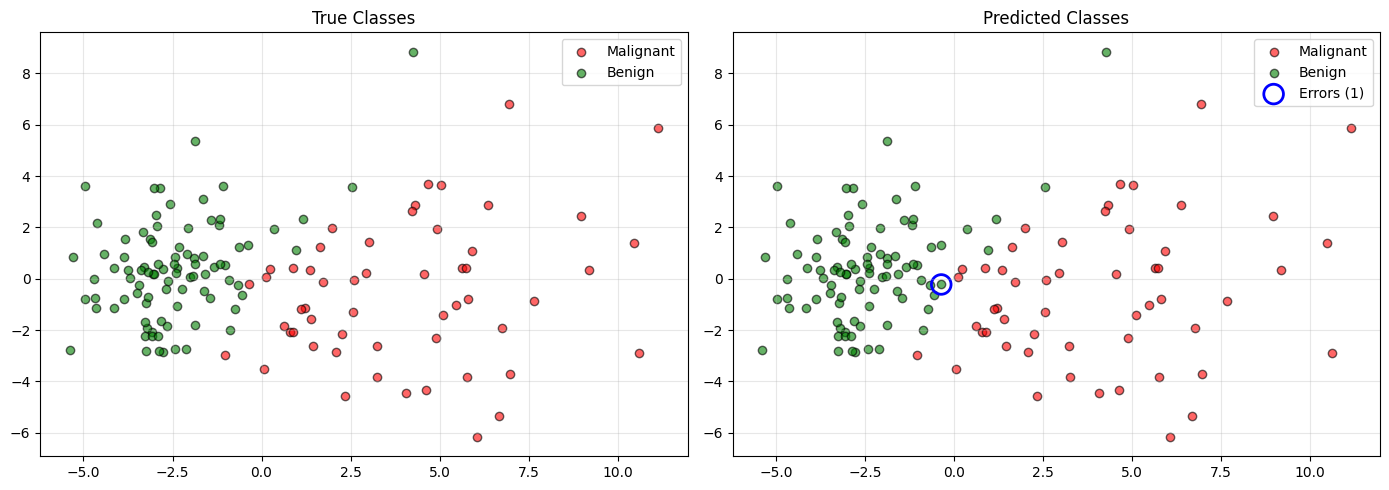

In [35]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Загрузка данных
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target.astype(float)

print(f"Data: {X_cancer.shape[0]} samples, {X_cancer.shape[1]} features")

# Train/Test Split (75/25, с shuffle для random=True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.25, random_state=42)

# Стандартизация
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Binary Logistic Regression с SGD (Nesterov momentum)
model = SGDClassifier(
    loss='log_loss',        # Logistic regression loss
    max_iter=1000,
    learning_rate='constant',
    eta0=0.001,             # lr
    random_state=42,
    verbose=0
)

model.fit(X_train_scaled, y_train)

# Предсказания
y_pred = model.predict(X_test_scaled)

# Метрики
accuracy = accuracy_score(y_test, y_pred)
print(f"\n{'='*50}")
print(f"SKLEARN LOGISTIC REGRESSION (BINARY)")
print(f"{'='*50}")
print(f"Accuracy: {accuracy:.2%}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))
print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"{'='*50}")

X_2d = PCA(2).fit_transform(X_test_scaled)
errors = (y_test != y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
for ax, y, title in [(ax1, y_test, 'True'), (ax2, y_pred, 'Predicted')]:
    ax.scatter(X_2d[y==0, 0], X_2d[y==0, 1], c='red', label='Malignant', alpha=0.6, edgecolors='k')
    ax.scatter(X_2d[y==1, 0], X_2d[y==1, 1], c='green', label='Benign', alpha=0.6, edgecolors='k')
    if ax == ax2 and errors.sum() > 0:
        ax.scatter(X_2d[errors, 0], X_2d[errors, 1], s=200, facecolors='none', 
                   edgecolors='blue', linewidths=2, label=f'Errors ({errors.sum()})')
    ax.set_title(f'{title} Classes')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


# Реализация на classicml

In [36]:
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target.astype(float)

print(f"Data: {X_cancer.shape[0]} samples, {X_cancer.shape[1]} features")

data_cancer = cml.Dataset(X_cancer, y_cancer)

scaler_cancer = cml.StandardScaler(data_cancer)
scaler_cancer.split(ratio=0.75, random=True)
scaler_cancer.standart_normalize()

logreg_cancer = cml.LogisticRegression(data_cancer, "binary")
logreg_cancer.train(method="nesterov", iters=1000, lr=0.001)
logreg_cancer.predict()
logreg_cancer.loss(threshold=0.5)
data_cancer.info()

Data: 569 samples, 30 features
logLoss: 0.0463036
accuracy: 0.559441
precision: 0.963855
recall: 0.987654
f1Score: 0.97561

  Y_test  |   Y_pred
  [0] 1   |   0.998677
  [1] 0   |   0.00131501
  [2] 1   |   0.999832
  [3] 0   |   4.97777e-07
  [4] 1   |   0.999907
  [5] 1   |   0.999994
  [6] 0   |   0.00237728
  [7] 1   |   0.776331
  [8] 0   |   1.6026e-08
  [9] 0   |   8.42839e-07
  [10] 0   |   0.00333532
  [11] 1   |   0.759071
  [12] 1   |   0.984426
  [13] 1   |   0.937752
  [14] 0   |   0.0093953
        ...        |       ...
Total samples: 143


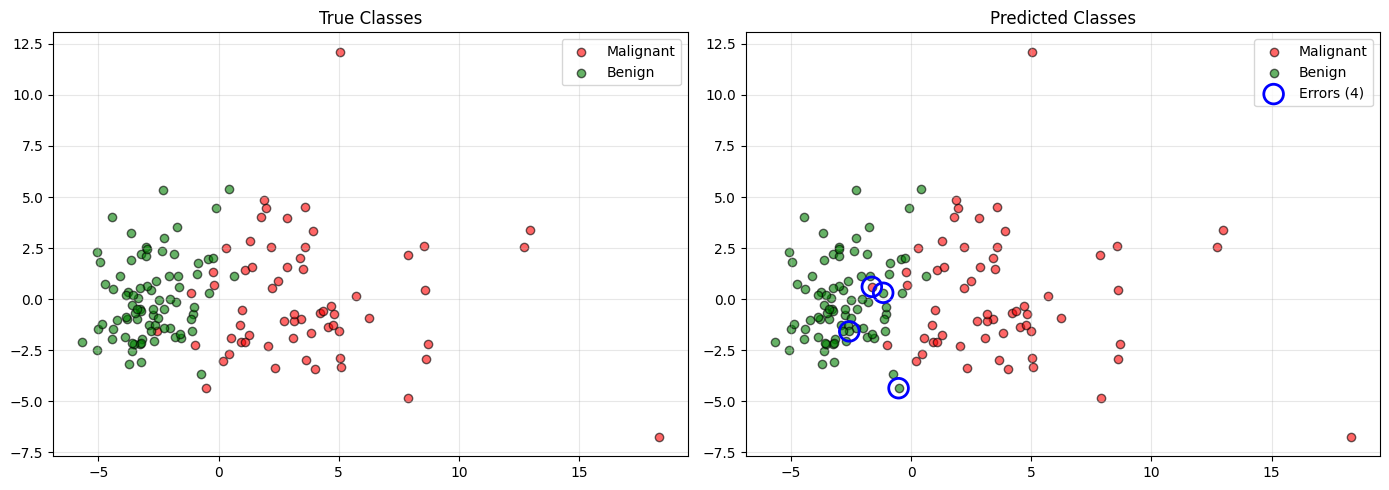

In [37]:
X = data_cancer.X_test_norm.to_numpy()
y_true = data_cancer.Y_test.to_numpy().flatten()
y_pred = (data_cancer.Y_pred.to_numpy() > 0.5).astype(int).flatten()
errors = (y_true != y_pred)

# PCA
X_2d = PCA(2).fit_transform(X)

# График
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
for ax, y, title in [(ax1, y_true, 'True'), (ax2, y_pred, 'Predicted')]:
    ax.scatter(X_2d[y==0, 0], X_2d[y==0, 1], c='red', label='Malignant', alpha=0.6, edgecolors='k')
    ax.scatter(X_2d[y==1, 0], X_2d[y==1, 1], c='green', label='Benign', alpha=0.6, edgecolors='k')
    if ax == ax2:
        ax.scatter(X_2d[errors, 0], X_2d[errors, 1], s=200, facecolors='none', edgecolors='blue', linewidths=2, label=f'Errors ({errors.sum()})')
    ax.set_title(f'{title} Classes')
    ax.legend()
    ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 3. CALIFORNIA HOUSING DATASET - KnnRegression

# Реализация на sklearn

Data: 1001 samples, 8 features

SKLEARN KNN REGRESSION
MSE:  0.14
RMSE: 0.37
R²:   0.807


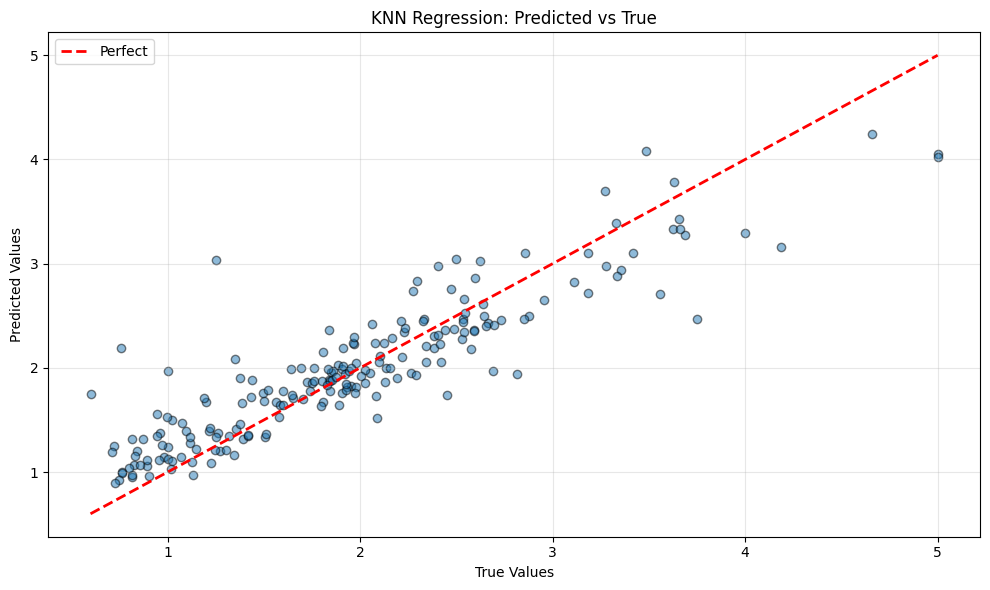

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

housing = fetch_california_housing()
X_house = housing.data[:1001]
y_house = housing.target[:1001]

print(f"Data: {X_house.shape[0]} samples, {X_house.shape[1]} features")

X_train, X_test, y_train, y_test = train_test_split(X_house, y_house, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsRegressor(
    n_neighbors=15,
    weights='distance',
    algorithm='auto',
    metric='minkowski',
    p=2
)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n{'='*50}")
print(f"SKLEARN KNN REGRESSION")
print(f"{'='*50}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")
print(f"{'='*50}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression: Predicted vs True')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Реализация на classicml

In [39]:
housing = fetch_california_housing()
X_house = housing.data[:1010]
y_house = housing.target[:1010]

print(f"Data: {X_house.shape[0]} samples, {X_house.shape[1]} features")

data_house = cml.Dataset(X_house, y_house)

scaler_house = cml.StandardScaler(data_house)
scaler_house.split(ratio=0.8, random=True)
scaler_house.standart_normalize()

lr_house = cml.KnnRegression(data_house, num_neighbors=15, weighted="distance")
lr_house.predict()
lr_house.loss()
data_house.info()

Data: 1010 samples, 8 features
MSE: 0.245566
RMSE: 0.495547
MAE: 0.319984
R2: 0.697435

  Y_test  |   Y_pred
  [0] 2.47   |   2.41728
  [1] 1.32   |   1.26536
  [2] 1.884   |   2.34069
  [3] 2.284   |   2.32538
  [4] 2.095   |   1.94049
  [5] 5.00001   |   4.10089
  [6] 2.138   |   2.04675
  [7] 1.799   |   1.84134
  [8] 2.184   |   1.74949
  [9] 1.406   |   1.7478
  [10] 2.325   |   1.97912
  [11] 1.833   |   2.0995
  [12] 2.232   |   1.89039
  [13] 3.006   |   2.60388
  [14] 1.681   |   1.77615
        ...        |       ...
Total samples: 202


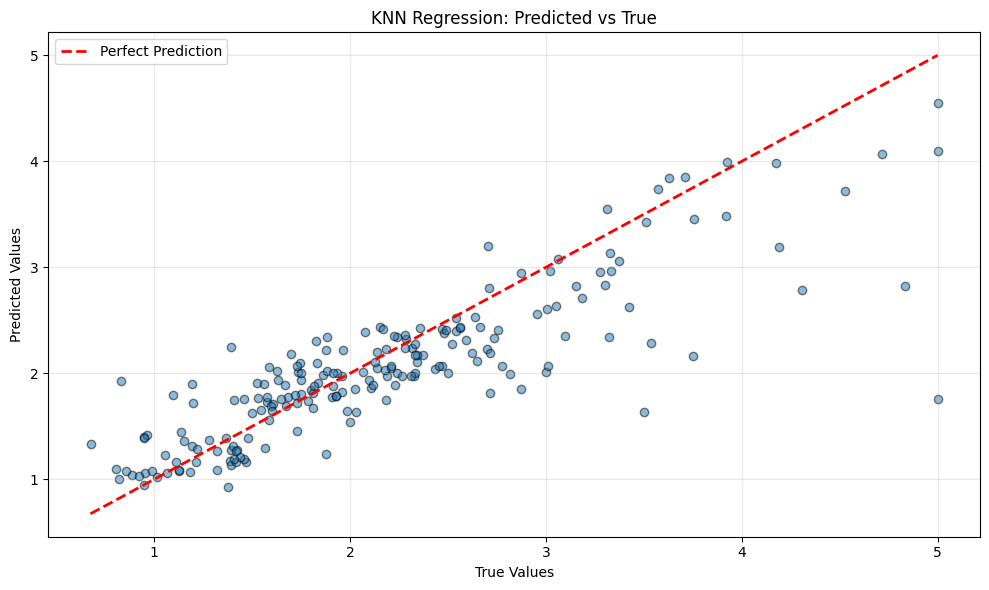

In [40]:
y_true = data_house.Y_test.to_numpy().flatten()
y_pred = data_house.Y_pred.to_numpy().flatten()


plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression: Predicted vs True')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 4. DIABETES - KNN Regression

# Реализация на sklearn

Data: 442 samples, 10 features

SKLEARN LINEAR REGRESSION RESULTS
MSE:  3026.15
RMSE: 55.01
R²:   0.429


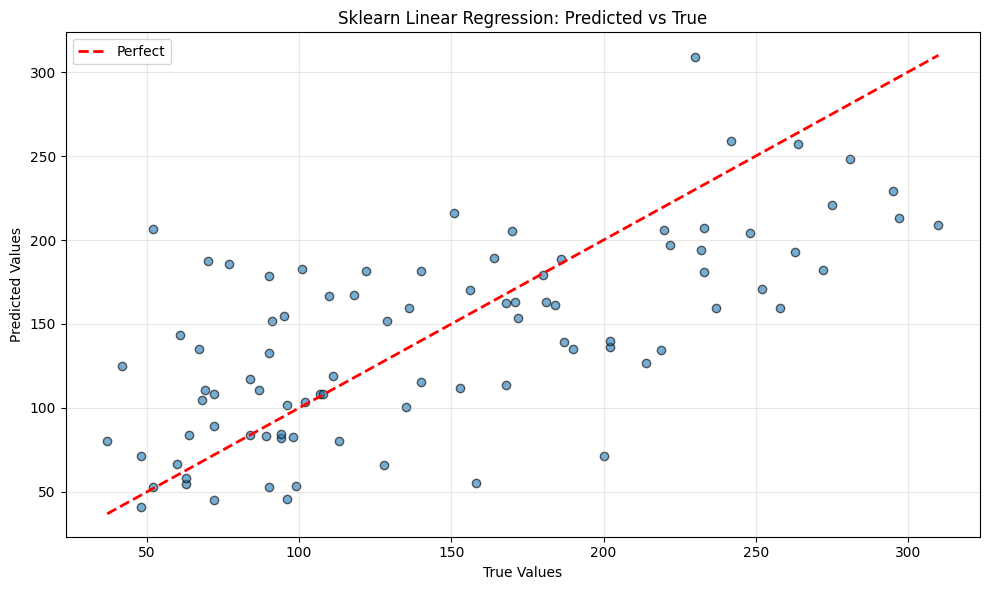

(<matplotlib.legend.Legend at 0x28fdbe16d40>, None, None, None)

In [41]:
from sklearn.linear_model import SGDRegressor

diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

print(f"Data: {X_diabetes.shape[0]} samples, {X_diabetes.shape[1]} features")


X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42, shuffle=True)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = SGDRegressor(
    max_iter=505,
    learning_rate='constant',
    eta0=0.01,
    random_state=42
)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n{'='*50}")
print(f"SKLEARN LINEAR REGRESSION RESULTS")
print(f"{'='*50}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")
print(f"{'='*50}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect')
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.title('Sklearn Linear Regression: Predicted vs True')
plt.legend(), plt.grid(alpha=0.3), plt.tight_layout(), plt.show()


# Реализация на classicml

In [42]:
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

print(f"Data: {X_diabetes.shape[0]} samples, {X_diabetes.shape[1]} features")

data_diabetes = cml.Dataset(X_diabetes, y_diabetes)

scaler_diabetes = cml.StandardScaler(data_diabetes)
scaler_diabetes.split(ratio=0.7, random=True)
scaler_diabetes.standart_normalize()

lr_synth = cml.LinearRegression(data_diabetes)
lr_synth.train(method="sgd", iters=1505, lr=0.01)
lr_synth.predict()
lr_synth.loss()
data_diabetes.info()

Data: 442 samples, 10 features
MSE: 2981.69
RMSE: 54.6048
MAE: 45.4622
R2: 0.495585

  Y_test  |   Y_pred
  [0] 142   |   132.704
  [1] 145   |   123.678
  [2] 277   |   247.814
  [3] 141   |   157.396
  [4] 222   |   190.41
  [5] 252   |   232.736
  [6] 136   |   157.427
  [7] 280   |   238.483
  [8] 197   |   149.49
  [9] 253   |   119.222
  [10] 95   |   157.505
  [11] 97   |   113.944
  [12] 83   |   66.3949
  [13] 277   |   176.558
  [14] 210   |   155.906
        ...        |       ...
Total samples: 133


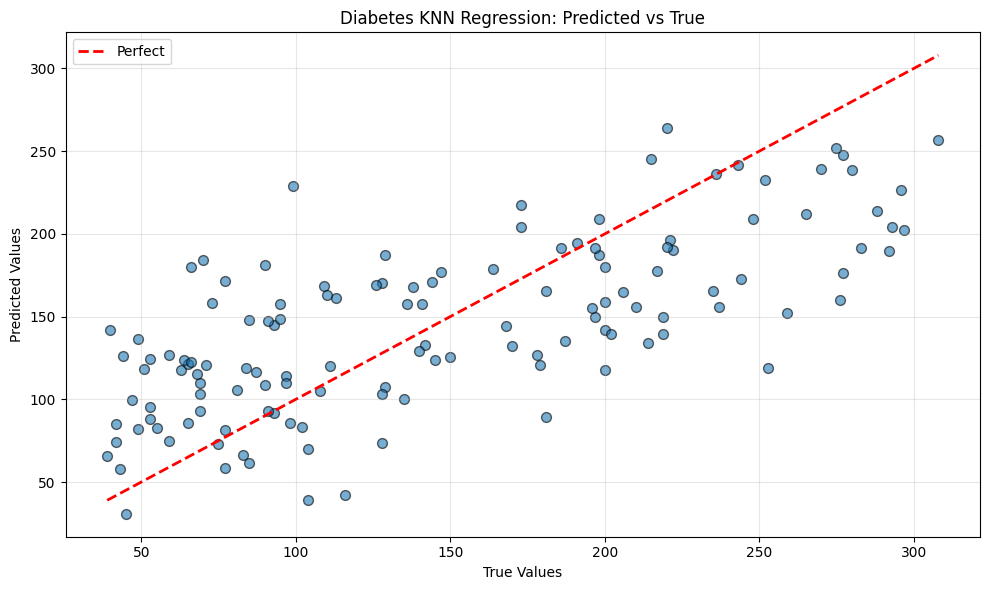

(<matplotlib.legend.Legend at 0x28fdcf8e290>, None, None, None)

In [43]:
y_true = data_diabetes.Y_test.to_numpy().flatten()
y_pred = data_diabetes.Y_pred.to_numpy().flatten()

plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.6, edgecolors='k', s=50)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Perfect')
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.title('Diabetes KNN Regression: Predicted vs True')
plt.legend(), plt.grid(alpha=0.3), plt.tight_layout(), plt.show()

# 5. WINE - KNN Classifier

# Реализация на sklearn

Data: 178 samples, 13 features, 3 classes

SKLEARN KNN CLASSIFICATION
Accuracy: 94.44%

Classification Report:
              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       1.00      0.86      0.92        14
     class_2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36


Confusion Matrix:
[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]


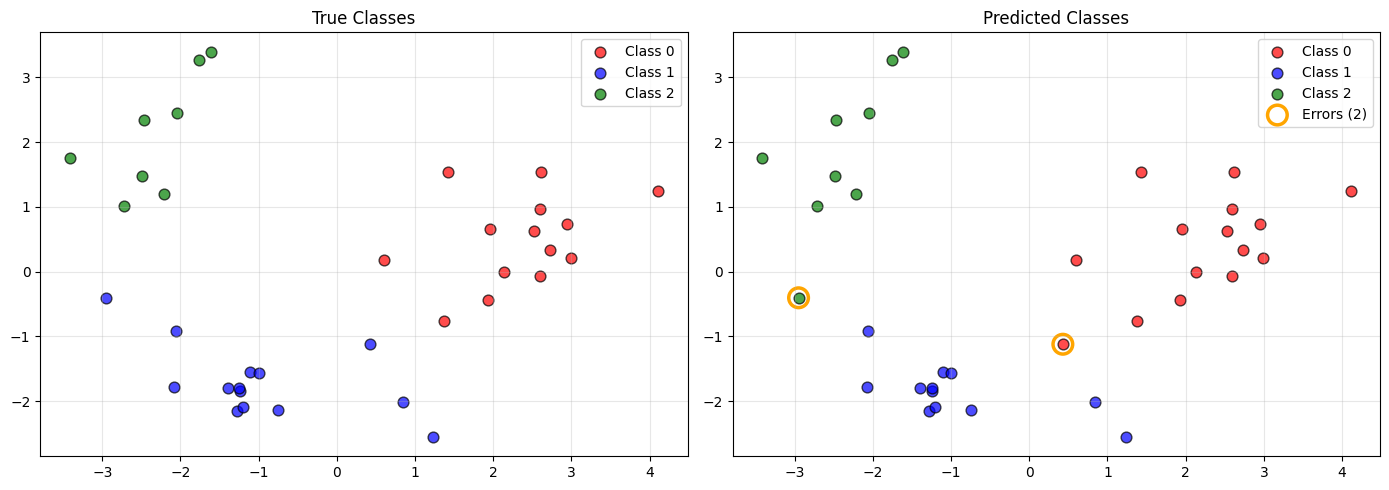

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

wine = load_wine()
X_wine = wine.data
y_wine = wine.target

print(f"Data: {X_wine.shape[0]} samples, {X_wine.shape[1]} features, {len(np.unique(y_wine))} classes")

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=5,weights='distance',metric='euclidean')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n{'='*50}")
print(f"SKLEARN KNN CLASSIFICATION")
print(f"{'='*50}")
print(f"Accuracy: {accuracy:.2%}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))
print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"{'='*50}")

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X_2d = PCA(2).fit_transform(X_test_scaled)
errors = (y_test != y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
colors = ['red', 'blue', 'green']
labels = ['Class 0', 'Class 1', 'Class 2']

for ax, y, title in [(ax1, y_test, 'True'), (ax2, y_pred, 'Predicted')]:
    for i in range(3):
        mask = (y == i)
        if mask.sum() > 0:
            ax.scatter(X_2d[mask, 0], X_2d[mask, 1], c=colors[i], label=labels[i],
                      s=60, alpha=0.7, edgecolors='k')
    if ax == ax2 and errors.sum() > 0:
        ax.scatter(X_2d[errors, 0], X_2d[errors, 1], s=200, facecolors='none',
                   edgecolors='orange', linewidths=2.5, label=f'Errors ({errors.sum()})')
    ax.set_title(f'{title} Classes')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


# Реализация на classicml

In [45]:
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

print(f"Data: {X_wine.shape[0]} samples, {X_wine.shape[1]} features, {len(np.unique(y_wine))} classes")

y_wine = cml.numpy_to_matrix(y_wine)
data_wine = cml.Dataset(X_wine, cml.one_hot_encoder(y_wine))

scaler_wine = cml.StandardScaler(data_wine)
scaler_wine.split(ratio=0.8, random=True)
scaler_wine.standart_normalize()

knn_clf = cml.Knn(data_wine, num_neighbors=15, weighted="distance")
knn_clf.predict("evklid")
knn_clf.loss()
data_wine.info()

Data: 178 samples, 13 features, 3 classes
accuracy: 0.972222
precision: 1
recall: 0.928571
f1Score: 0.962963

  Y_test  |   Y_pred
  [0] 1   |   1
  [1] 0   |   0
  [2] 2   |   2
  [3] 1   |   1
  [4] 0   |   0
  [5] 2   |   2
  [6] 0   |   0
  [7] 1   |   1
  [8] 1   |   1
  [9] 2   |   2
  [10] 1   |   1
  [11] 2   |   2
  [12] 2   |   2
  [13] 1   |   1
  [14] 2   |   2
        ...        |       ...
Total samples: 36


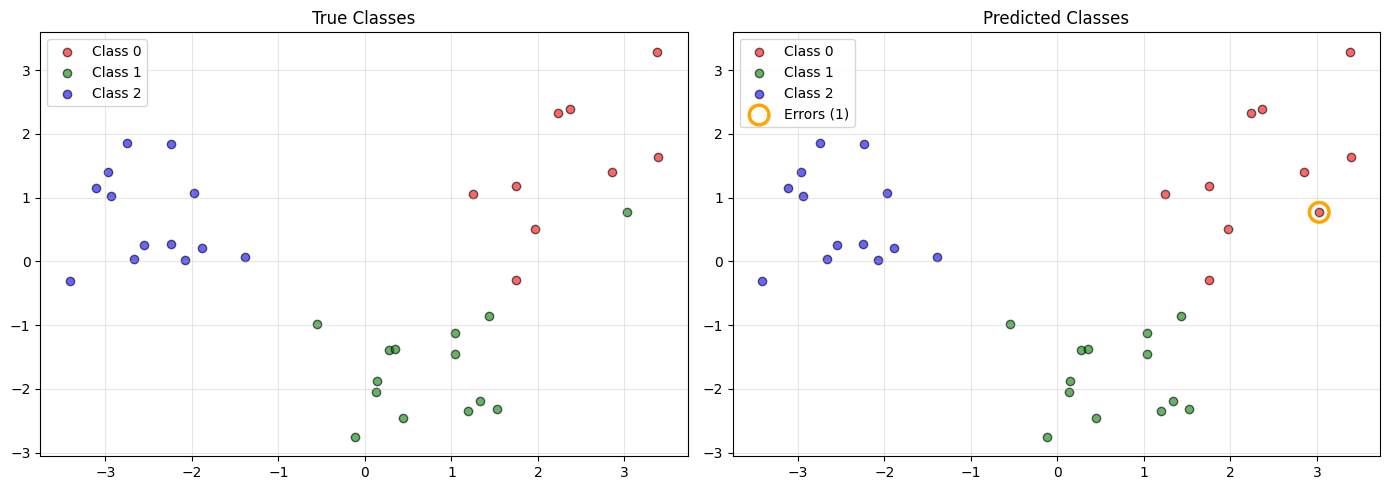

In [46]:
X_test = data_wine.X_test_norm.to_numpy()
y_test = data_wine.Y_test.to_numpy().flatten()
y_pred = data_wine.Y_pred.to_numpy().flatten()
errors = (y_test != y_pred)

# PCA в 2D
X_2d = PCA(2).fit_transform(X_test)

# График
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
class_names = ['Class 0', 'Class 1', 'Class 2']
colors = ['red', 'green', 'blue']

for ax, y, title in [(ax1, y_test, 'True'), (ax2, y_pred, 'Predicted')]:
    for i, (name, color) in enumerate(zip(class_names, colors)):
        mask = (y == i)
        ax.scatter(X_2d[mask, 0], X_2d[mask, 1], c=color, label=name, alpha=0.6, edgecolors='k')
    if ax == ax2 and errors.sum() > 0:
        ax.scatter(X_2d[errors, 0], X_2d[errors, 1], s=200, facecolors='none', 
                   edgecolors='orange', linewidths=2.5, label=f'Errors ({errors.sum()})')
    ax.set_title(f'{title} Classes')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 6. SYNTHETIC CLUSTERING DATASET - K-Means

# Реализация на sklearn

Data: 300 samples, 2 features
True clusters: 3

SKLEARN K-MEANS CLUSTERING
Inertia:          5.90
Silhouette Score: 0.879
Adjusted Rand Index: 1.000


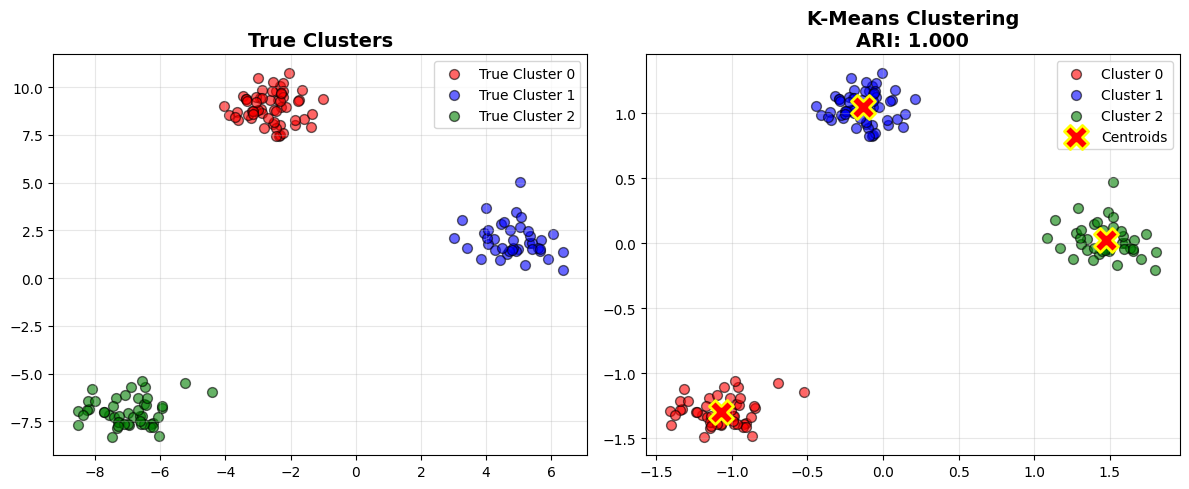

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

X_clusters, y_true = make_blobs(
    n_samples=300,
    centers=3,
    n_features=2,
    random_state=42,
    cluster_std=0.8
)

print(f"Data: {X_clusters.shape[0]} samples, {X_clusters.shape[1]} features")
print(f"True clusters: 3")

split_idx = int(0.5 * len(X_clusters))
X_train = X_clusters[:split_idx]
y_true_train = y_true[:split_idx]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    max_iter=100,
    random_state=42,
    n_init=10
)

labels = kmeans.fit_predict(X_train_scaled)
centroids = kmeans.cluster_centers_

inertia = kmeans.inertia_
silhouette = silhouette_score(X_train_scaled, labels)
ari = adjusted_rand_score(y_true_train, labels)

print(f"\n{'='*50}")
print(f"SKLEARN K-MEANS CLUSTERING")
print(f"{'='*50}")
print(f"Inertia:          {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Adjusted Rand Index: {ari:.3f}")
print(f"{'='*50}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors_true = ['red', 'blue', 'green']
for i in range(3):
    mask = (y_true_train == i)
    plt.scatter(X_train[mask, 0], X_train[mask, 1], c=colors_true[i], 
               label=f'True Cluster {i}', s=50, alpha=0.6, edgecolors='k')
plt.title('True Clusters', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
colors_pred = ['red', 'blue', 'green']
for i in range(3):
    mask = (labels == i)
    plt.scatter(X_train_scaled[mask, 0], X_train_scaled[mask, 1], c=colors_pred[i],
               label=f'Cluster {i}', s=50, alpha=0.6, edgecolors='k')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X',
           s=300, edgecolors='yellow', linewidths=2, label='Centroids', zorder=10)

plt.title(f'K-Means Clustering\nARI: {ari:.3f}', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


# Реализация на claccicml

In [59]:
X_clusters, y_true = make_blobs(
    n_samples=300,
    centers=3,
    n_features=2,
    random_state=42,
    cluster_std=0.8
)

print(f"Data: {X_clusters.shape[0]} samples, {X_clusters.shape[1]} features")
print(f"True clusters: 3")

y_dummy = np.zeros((X_clusters.shape[0], 1))
data_clusters = cml.Dataset(X_clusters, y_dummy)

scaler_clusters = cml.StandardScaler(data_clusters)
scaler_clusters.split(ratio=0.5, random=True)
scaler_clusters.standart_normalize()

kmeans = cml.KMeans(data_clusters, k=3, max_iters=100)
kmeans.train(method="pp", rho="evklid")
# kmeans.predict(data_clusters.X_test, rho="evklid")
kmeans.loss()

centroids = kmeans.get_centroids()
data_clusters.info()

Data: 300 samples, 2 features
True clusters: 3
Inertia: 5.76243
  Y_test  |   Y_pred
  [0] 0   |   0
  [1] 0   |   1
  [2] 0   |   0
  [3] 0   |   2
  [4] 0   |   1
  [5] 0   |   0
  [6] 0   |   1
  [7] 0   |   2
  [8] 0   |   2
  [9] 0   |   0
  [10] 0   |   0
  [11] 0   |   0
  [12] 0   |   2
  [13] 0   |   0
  [14] 0   |   2
        ...        |       ...
Total samples: 150


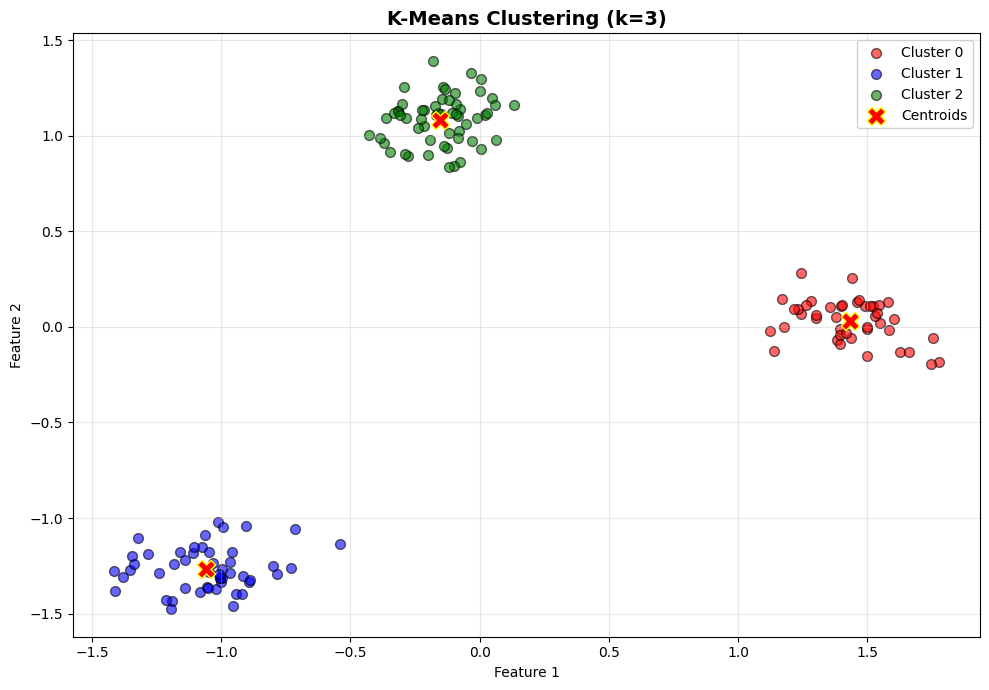

In [60]:
X = data_clusters.X_train_norm.to_numpy()

labels_pred = data_clusters.Y_pred.to_numpy().flatten().astype(int)

cent = centroids.to_numpy()

plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'green']
for i in range(3):
    mask = (labels_pred == i)
    plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], label=f'Cluster {i}', s=50, alpha=0.6, edgecolors='k')

plt.scatter(cent[:, 0], cent[:, 1], c='red', marker='X', s=170, edgecolors='yellow', linewidths=1, label='Centroids', zorder=10)

plt.title('K-Means Clustering (k=3)', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best', framealpha=0.9)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 7. IRIS DATASET - K-Means Clustering

# Реализация на sklearn

Data: 150 samples, 4 features
True classes (for reference): 3


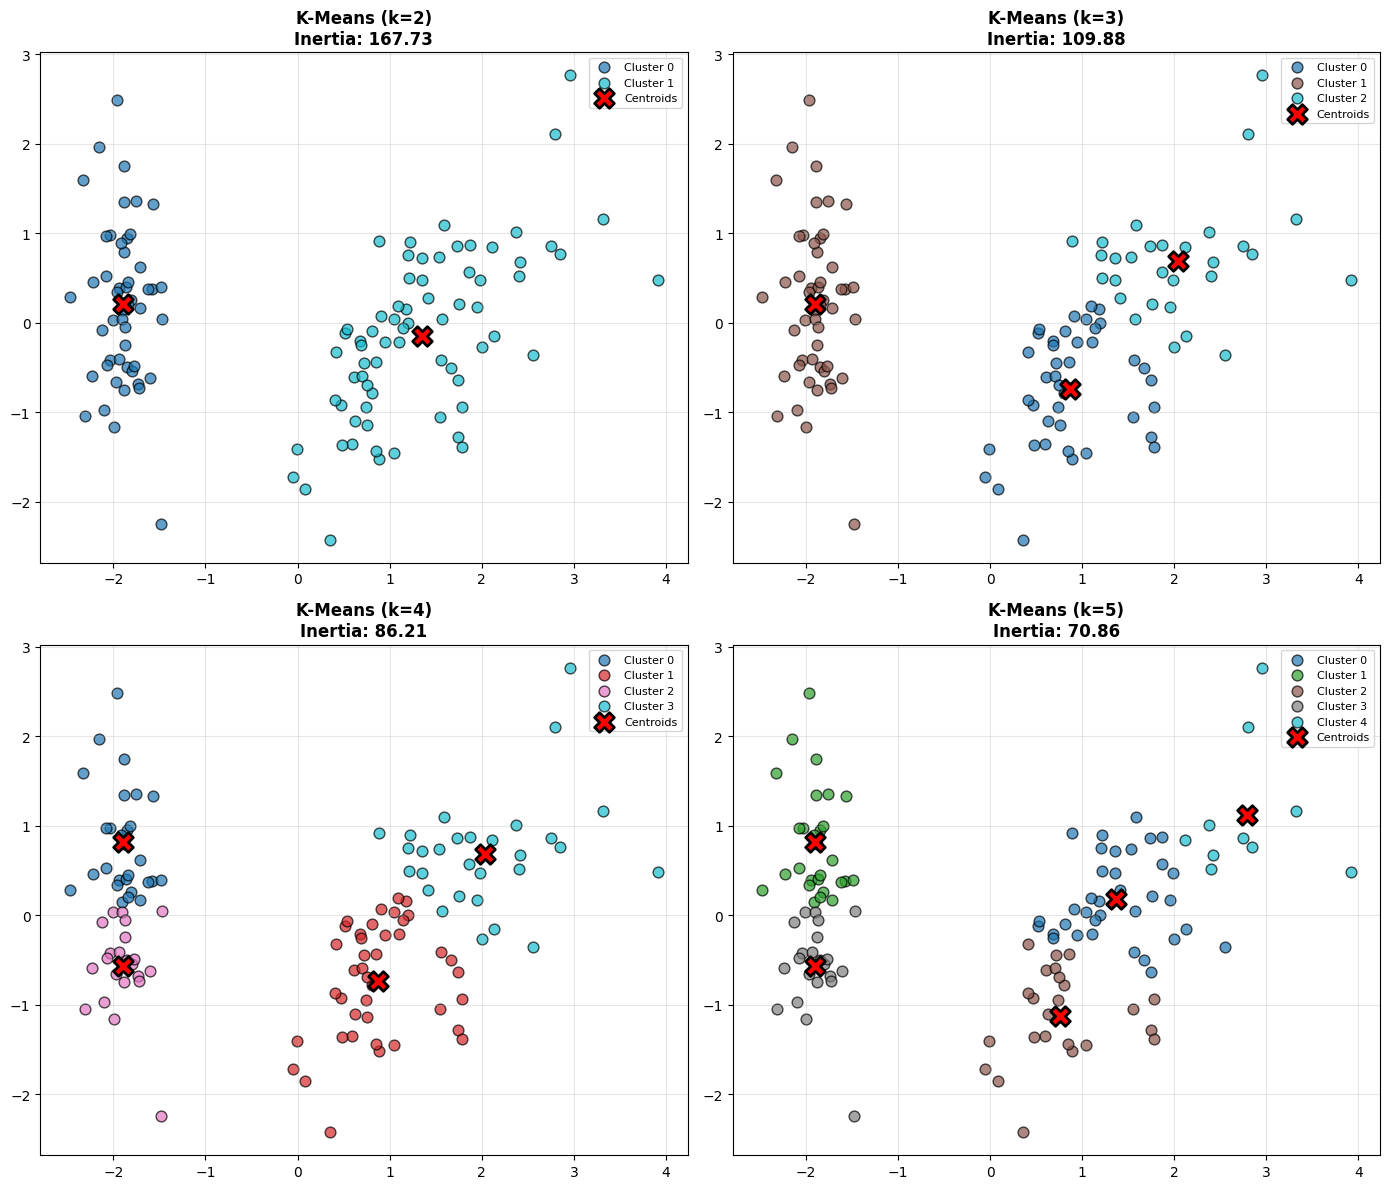


K-MEANS CLUSTERING RESULTS
k     Inertia     
------------------------------------------------------------
2     167.73      
3     109.88      
4     86.21       
5     70.86       
Note: Best Silhouette = highest, Best Davies-Bouldin = lowest


In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

iris = load_iris()
X_iris = iris.data

print(f"Data: {X_iris.shape[0]} samples, {X_iris.shape[1]} features")
print(f"True classes (for reference): {len(np.unique(iris.target))}")

split_idx = int(0.8 * len(X_iris))
X_train = X_iris[:split_idx]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(2)
X_2d = pca.fit_transform(X_train_scaled)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
k_values = [2, 3, 4, 5]
results = []

for idx, (ax, k) in enumerate(zip(axes.flat, k_values)):
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        max_iter=100,
        n_init=10,
        random_state=42
    )
    
    labels = kmeans.fit_predict(X_train_scaled)
    
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_train_scaled, labels)
    davies_bouldin = davies_bouldin_score(X_train_scaled, labels)
    
    results.append({
        'k': k,
        'inertia': inertia
    })
    
    colors = plt.cm.tab10(np.linspace(0, 1, k))
    for i in range(k):
        mask = (labels == i)
        if mask.sum() > 0:
            ax.scatter(X_2d[mask, 0], X_2d[mask, 1], c=[colors[i]], 
                      label=f'Cluster {i}', s=60, alpha=0.7, edgecolors='k')
    
    centroids = kmeans.cluster_centers_
    centroids_2d = pca.transform(centroids)
    ax.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='X',
              s=200, edgecolors='black', linewidths=2, label='Centroids', zorder=10)
    
    ax.set_title(f'K-Means (k={k})\nInertia: {inertia:.2f}', fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=8)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Сравнительная таблица
print(f"\n{'='*60}")
print(f"K-MEANS CLUSTERING RESULTS")
print(f"{'='*60}")
print(f"{'k':<5} {'Inertia':<12}")
print(f"{'-'*60}")
for res in results:
    print(f"{res['k']:<5} {res['inertia']:<12.2f}")
print(f"{'='*60}")
print("Note: Best Silhouette = highest, Best Davies-Bouldin = lowest")


# Реализация на claccicml

In [51]:
iris = load_iris()
X_iris = iris.data

print(f"Data: {X_iris.shape[0]} samples, {X_iris.shape[1]} features")
print(f"True classes (for reference): {len(np.unique(iris.target))}")

y_iris_dummy = np.zeros((X_iris.shape[0], 1))
data_iris_clustering = cml.Dataset(X_iris, y_iris_dummy)

scaler_iris_clustering = cml.StandardScaler(data_iris_clustering)
scaler_iris_clustering.split(ratio=0.8, random=True)
scaler_iris_clustering.standart_normalize()

for k_val in [2, 3, 4, 5]:
    print(f"\n  K-Means with k={k_val}:")
    kmeans_iris = cml.KMeans(data_iris_clustering, k=k_val, max_iters=100)
    kmeans_iris.train(method="pp", rho="evklid")
    kmeans_iris.loss()
    data_iris_clustering.info()


Data: 150 samples, 4 features
True classes (for reference): 3

  K-Means with k=2:
Inertia: 357.513
  Y_test  |   Y_pred
  [0] 0   |   1
  [1] 0   |   0
  [2] 0   |   0
  [3] 0   |   0
  [4] 0   |   0
  [5] 0   |   1
  [6] 0   |   0
  [7] 0   |   1
  [8] 0   |   0
  [9] 0   |   0
  [10] 0   |   0
  [11] 0   |   0
  [12] 0   |   0
  [13] 0   |   0
  [14] 0   |   0
        ...        |       ...
Total samples: 30

  K-Means with k=3:
Inertia: 225.47
  Y_test  |   Y_pred
  [0] 0   |   1
  [1] 0   |   0
  [2] 0   |   0
  [3] 0   |   0
  [4] 0   |   0
  [5] 0   |   1
  [6] 0   |   0
  [7] 0   |   1
  [8] 0   |   0
  [9] 0   |   0
  [10] 0   |   2
  [11] 0   |   0
  [12] 0   |   2
  [13] 0   |   2
  [14] 0   |   2
        ...        |       ...
Total samples: 30

  K-Means with k=4:
Inertia: 106.401
  Y_test  |   Y_pred
  [0] 0   |   1
  [1] 0   |   0
  [2] 0   |   0
  [3] 0   |   3
  [4] 0   |   0
  [5] 0   |   1
  [6] 0   |   0
  [7] 0   |   1
  [8] 0   |   0
  [9] 0   |   3
  [10] 0   |  

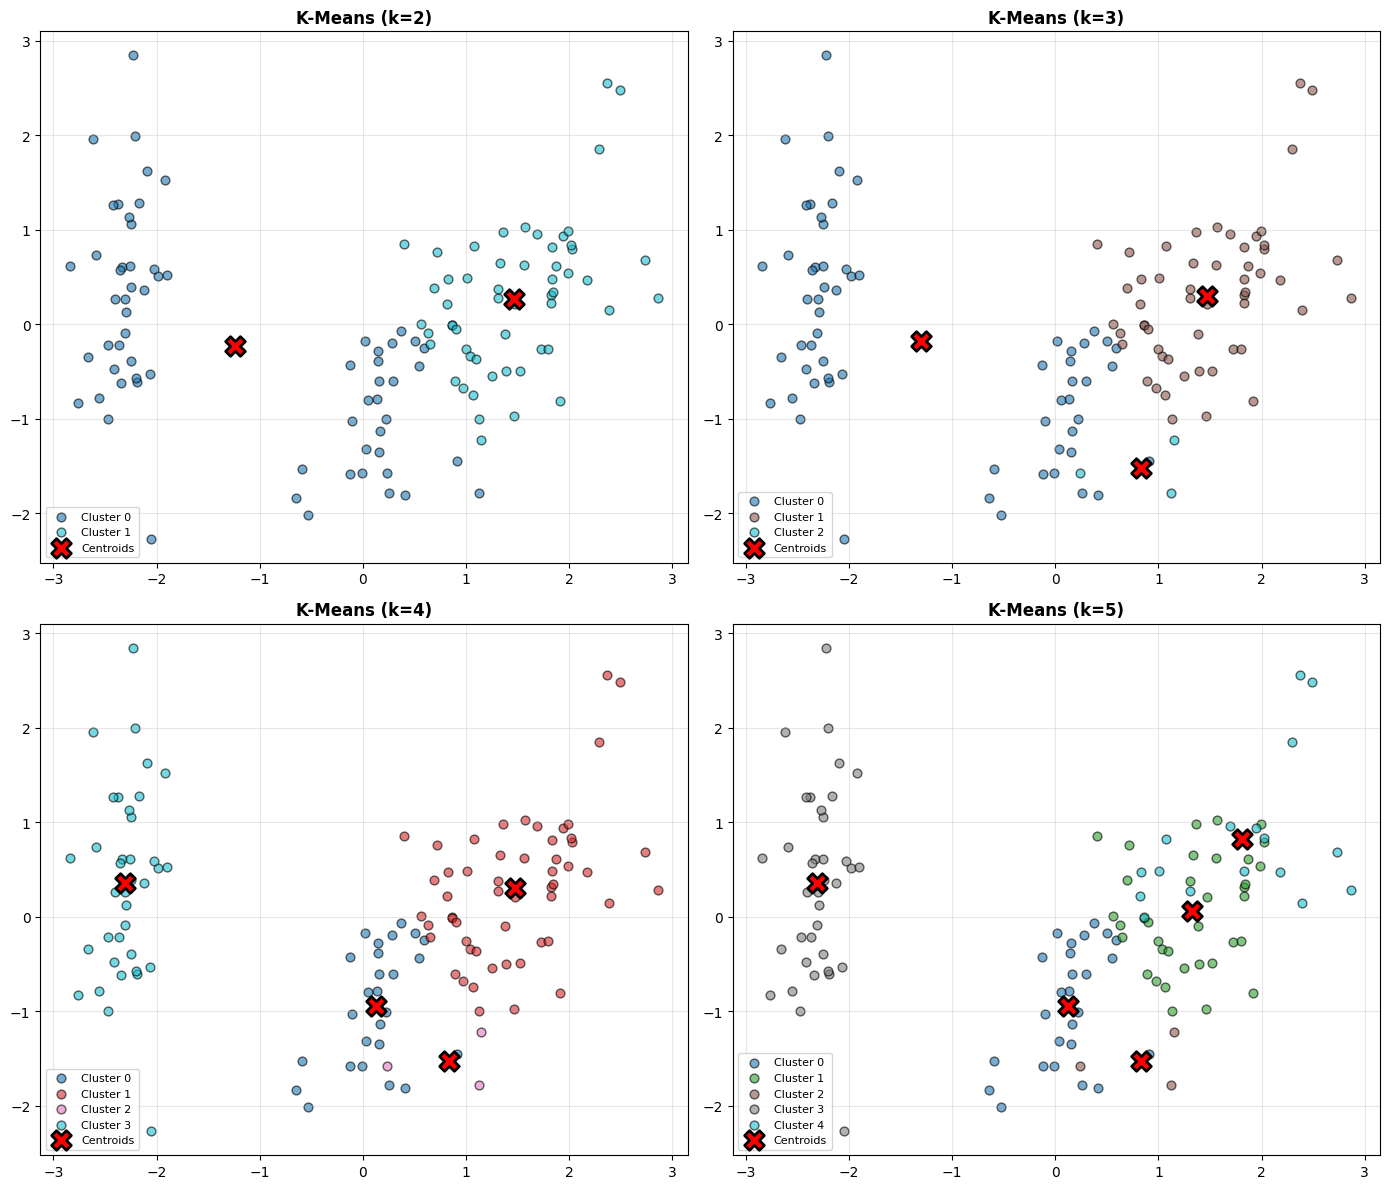

In [52]:
X_train = data_iris_clustering.X_train_norm.to_numpy()
X_2d = PCA(2).fit_transform(X_train)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
k_values = [2, 3, 4, 5]

for idx, (ax, k) in enumerate(zip(axes.flat, k_values)):
    kmeans = cml.KMeans(data_iris_clustering, k=k, max_iters=100)
    kmeans.train(method="base", rho="evklid")
    
    labels = data_iris_clustering.Y_pred.to_numpy().flatten().astype(int)
    
    cent = kmeans.get_centroids().to_numpy()
    
    colors = plt.cm.tab10(np.linspace(0, 1, k))
    for i in range(k):
        mask = (labels == i)
        if mask.sum() > 0:
            ax.scatter(X_2d[mask, 0], X_2d[mask, 1], c=[colors[i]], 
                      label=f'Cluster {i}', s=40, alpha=0.6, edgecolors='k')
    
    cent_2d = PCA(2).fit(X_train).transform(cent)
    ax.scatter(cent_2d[:, 0], cent_2d[:, 1], c='red', marker='X', 
              s=200, edgecolors='black', linewidths=2, label='Centroids', zorder=10)
    
    ax.set_title(f'K-Means (k={k})', fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=8)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 8. SYNTHETIC REGRESSION DATASET - Linear Regression

# Реализация на sklearn

Data: 500 samples, 3 features
True weights: [ 3.  5. -2.]

SKLEARN LINEAR REGRESSION COMPARISON
SGD (Nesterov):
  MSE:  0.2842
  R²:   0.9892

Analytical Solution:
  MSE:  0.2755
  R²:   0.9895

Learned weights (SGD): [ 2.72524147  4.94676763 -2.0499263 ]
Learned weights (LR):  [ 2.75299542  4.97698648 -2.07248774]
True weights:          [ 3.  5. -2.]


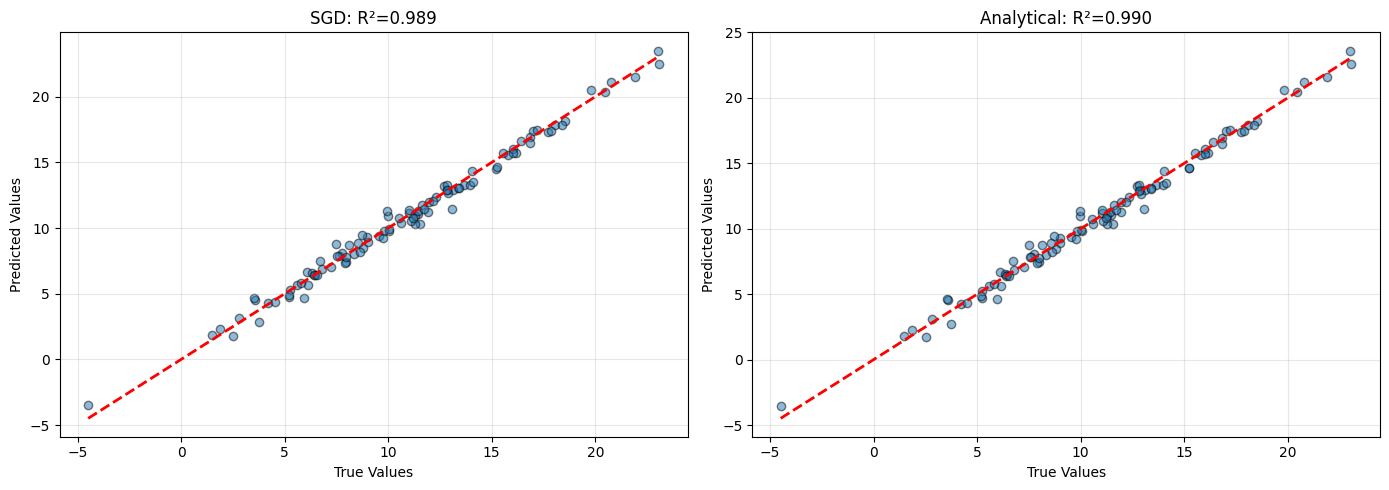

In [53]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)
n_samples = 500
n_features = 3

X_synth = np.random.randn(n_samples, n_features)
true_weights = np.array([3.0, 5.0, -2.0])
noise = np.random.randn(n_samples) * 0.5
y_synth = X_synth @ true_weights + noise + 10

print(f"Data: {n_samples} samples, {n_features} features")
print(f"True weights: {true_weights}")

split_idx = int(0.8 * n_samples)
X_train, X_test = X_synth[:split_idx], X_synth[split_idx:]
y_train, y_test = y_synth[:split_idx], y_synth[split_idx:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_sgd = SGDRegressor(
    max_iter=1500,
    learning_rate='constant',
    eta0=0.01,
    random_state=42,
    verbose=0
)
model_sgd.fit(X_train_scaled, y_train)
y_pred_sgd = model_sgd.predict(X_test_scaled)

model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\n{'='*50}")
print(f"SKLEARN LINEAR REGRESSION COMPARISON")
print(f"{'='*50}")
print(f"SGD (Nesterov):")
print(f"  MSE:  {mse_sgd:.4f}")
print(f"  R²:   {r2_sgd:.4f}")
print(f"\nAnalytical Solution:")
print(f"  MSE:  {mse_lr:.4f}")
print(f"  R²:   {r2_lr:.4f}")
print(f"\nLearned weights (SGD): {model_sgd.coef_}")
print(f"Learned weights (LR):  {model_lr.coef_}")
print(f"True weights:          {true_weights}")
print(f"{'='*50}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.scatter(y_test, y_pred_sgd, alpha=0.5, edgecolors='k')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('True Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title(f'SGD: R²={r2_sgd:.3f}')
ax1.grid(alpha=0.3)

ax2.scatter(y_test, y_pred_lr, alpha=0.5, edgecolors='k')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('True Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title(f'Analytical: R²={r2_lr:.3f}')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Реализация на classicml

In [54]:
np.random.seed(42)

n_samples = 500
n_features = 3

X_synth = np.random.randn(n_samples, n_features)
true_weights = np.array([3.0, 5.0, -2.0])
noise = np.random.randn(n_samples) * 0.5
y_synth = X_synth @ true_weights + noise + 10

print(f"Data: {n_samples} samples, {n_features} features")

data_synth = cml.Dataset(X_synth, y_synth)

scaler_synth = cml.StandardScaler(data_synth)
scaler_synth.split(ratio=0.8, random=False)
scaler_synth.standart_normalize()

lr_synth = cml.LinearRegression(data_synth)
lr_synth.train(method="nesterov", iters=1500, lr=0.01)
lr_synth.predict()
lr_synth.loss()

Data: 500 samples, 3 features
MSE: 0.276283
RMSE: 0.525626
MAE: 0.408076
R2: 0.989484



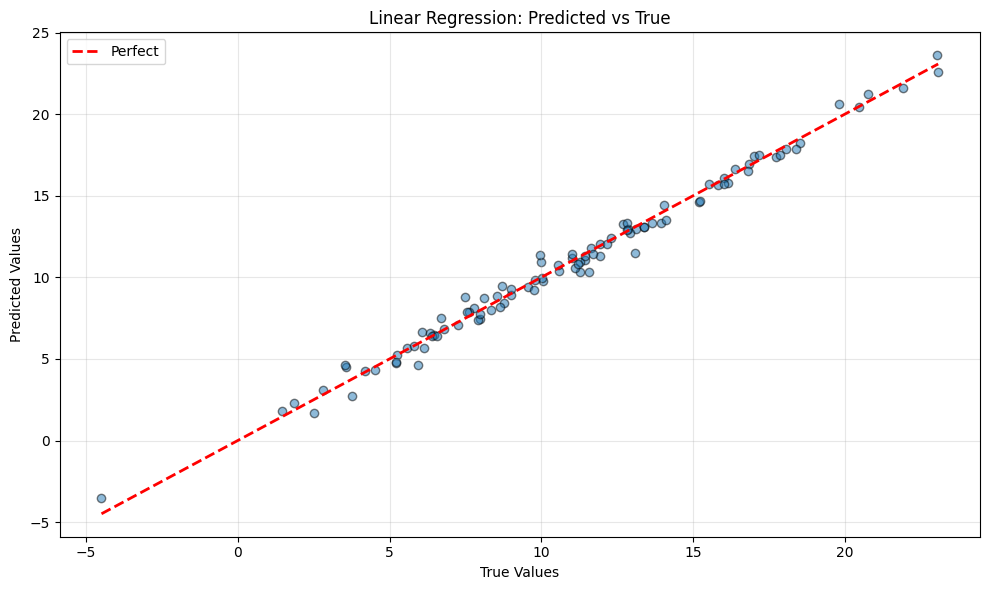

In [55]:
y_true = data_synth.Y_test.to_numpy().flatten()
y_pred = data_synth.Y_pred.to_numpy().flatten()

plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Perfect')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted vs True')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 9. CSV DATASET EXAMPLE (Titanic-like) - Logistic Regression

# Реализация на sklearn

C:\Users\dima2\AppData\Local\Temp\ipykernel_21808\2735219313.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


Data: 891 samples, 6 features
Log Loss: 7.1280

SKLEARN TITANIC KNN CLASSIFICATION
Accuracy: 80.22%

Classification Report:
              precision    recall  f1-score   support

        Died       0.82      0.84      0.83       157
    Survived       0.77      0.75      0.76       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.80      0.80      0.80       268


Confusion Matrix:
[[132  25]
 [ 28  83]]


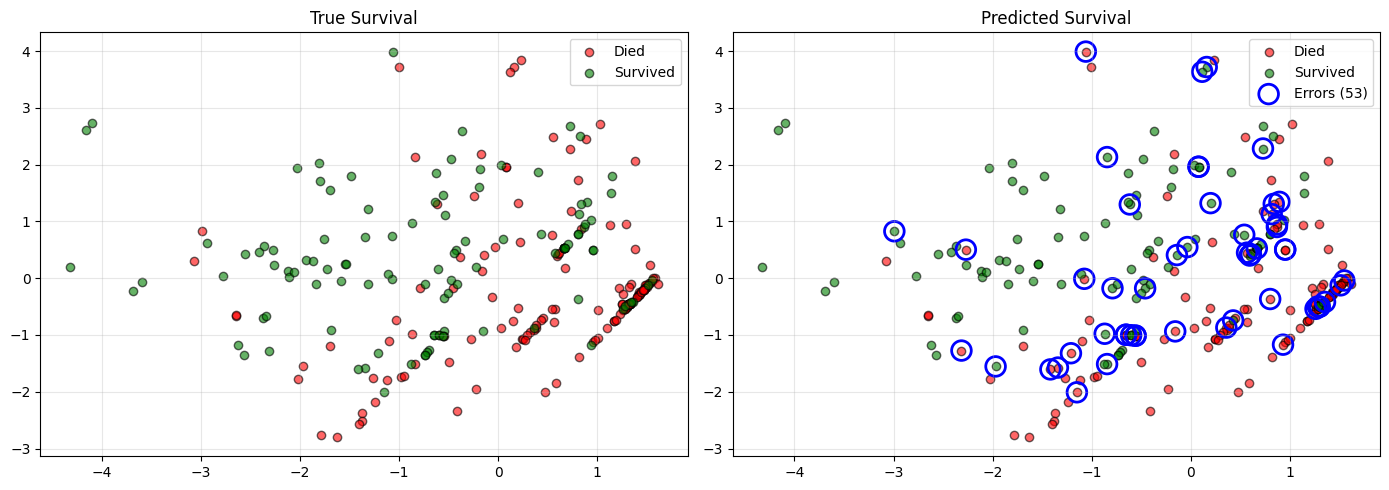

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix


# Загрузка и обработка данных
df = pd.read_csv('Titanic-Dataset.csv')
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

X_titanic = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].values
y_titanic = df['Survived'].values.astype(float)

print(f"Data: {X_titanic.shape[0]} samples, {X_titanic.shape[1]} features")

# Train/Test Split (70/30)
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.3, random_state=42)

# Стандартизация
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Classification
model = KNeighborsClassifier(
    n_neighbors=3,
    weights='uniform',  # или 'distance'
    metric='euclidean'
)

model.fit(X_train_scaled, y_train)

# Предсказания
y_pred = model.predict(X_test_scaled)

# Метрики
accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)
print(f"Log Loss: {logloss:.4f}")
print(f"\n{'='*50}")
print(f"SKLEARN TITANIC KNN CLASSIFICATION")
print(f"{'='*50}")
print(f"Accuracy: {accuracy:.2%}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Died', 'Survived']))
print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"{'='*50}")

# График
X_2d = PCA(2).fit_transform(X_test_scaled)
errors = (y_test != y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
for ax, y, title in [(ax1, y_test, 'True'), (ax2, y_pred, 'Predicted')]:
    ax.scatter(X_2d[y==0, 0], X_2d[y==0, 1], c='red', label='Died', alpha=0.6, edgecolors='k')
    ax.scatter(X_2d[y==1, 0], X_2d[y==1, 1], c='green', label='Survived', alpha=0.6, edgecolors='k')
    if ax == ax2 and errors.sum() > 0:
        ax.scatter(X_2d[errors, 0], X_2d[errors, 1], s=200, facecolors='none',
                   edgecolors='blue', linewidths=2, label=f'Errors ({errors.sum()})')
    ax.set_title(f'{title} Survival')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


# Реализация на classicml

In [57]:
df = pd.read_csv('Titanic-Dataset.csv')
df['Age'].fillna(df['Age'].median(), inplace=True)

df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

X_titanic = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].values
y_titanic = df['Survived'].values.astype(float)

print(f"Data: {X_titanic.shape[0]} samples, {X_titanic.shape[1]} features")

y_titanic = cml.numpy_to_matrix(y_titanic)
data_titanic = cml.Dataset(X_titanic, cml.one_hot_encoder(y_titanic))

scaler_titanic = cml.StandardScaler(data_titanic)
scaler_titanic.split(ratio=0.7, random=True)
scaler_titanic.standart_normalize()

knn_clf = cml.Knn(data_titanic, num_neighbors=3, weighted = "uniform")
knn_clf.predict("evklid")
knn_clf.loss()
data_titanic.info()

# logreg_titanic = cml.LogisticRegression(data_titanic, "binary")
# logreg_titanic.train(method="sgd", iters=505, lr=0.1)
# logreg_titanic.predict()
# logreg_titanic.loss(threshold=0.5)
# data_titanic.info()


C:\Users\dima2\AppData\Local\Temp\ipykernel_21808\2610976011.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


Data: 891 samples, 6 features
accuracy: 0.809701
precision: 0.75
recall: 0.785047
f1Score: 0.767123

  Y_test  |   Y_pred
  [0] 1   |   1
  [1] 1   |   1
  [2] 0   |   0
  [3] 0   |   0
  [4] 1   |   0
  [5] 0   |   0
  [6] 0   |   0
  [7] 1   |   1
  [8] 0   |   1
  [9] 0   |   1
  [10] 0   |   1
  [11] 1   |   0
  [12] 0   |   0
  [13] 0   |   1
  [14] 1   |   1
        ...        |       ...
Total samples: 268


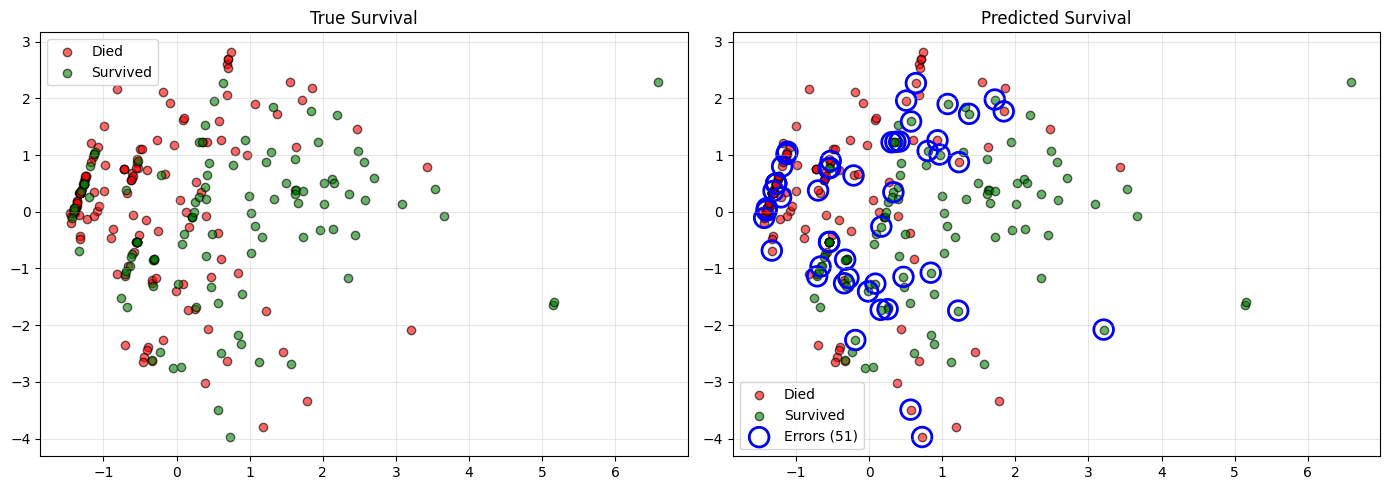

In [58]:
X_test = data_titanic.X_test_norm.to_numpy()
y_test = data_titanic.Y_test.to_numpy().flatten()
y_pred = (data_titanic.Y_pred.to_numpy() > 0.5).astype(int).flatten()
errors = (y_test != y_pred)

X_2d = PCA(2).fit_transform(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
for ax, y, title in [(ax1, y_test, 'True'), (ax2, y_pred, 'Predicted')]:
    ax.scatter(X_2d[y==0, 0], X_2d[y==0, 1], c='red', label='Died', alpha=0.6, edgecolors='k')
    ax.scatter(X_2d[y==1, 0], X_2d[y==1, 1], c='green', label='Survived', alpha=0.6, edgecolors='k')
    if ax == ax2 and errors.sum() > 0:
        ax.scatter(X_2d[errors, 0], X_2d[errors, 1], s=200, facecolors='none', 
                   edgecolors='blue', linewidths=2, label=f'Errors ({errors.sum()})')
    ax.set_title(f'{title} Survival')
    ax.legend()
    ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()